In [104]:
#Import package
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize


In [105]:
#load Dataset
data_analyst_df = pd.read_csv('/Users/nuel/neuefische/Capstone-Project-/dataset/DataAnalyst.csv')
data_scientist_df = pd.read_csv('/Users/nuel/neuefische/Capstone-Project-/dataset/DataScientist.csv')
google_job = pd.read_csv('/Users/nuel/neuefische/Capstone-Project-/dataset/gsearch_jobs 3.csv')


In [106]:
#Rename Columns to lower and replace white spaces with Underscore
data_analyst_df.rename(columns=lambda x : x.lower(), inplace=True)
data_analyst_df.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)
data_scientist_df.rename(columns=lambda x : x.lower(), inplace=True)
data_scientist_df.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)
google_job.rename(columns=lambda x : x.lower(), inplace=True)
google_job.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)


In [107]:
#data_analyst_df.head(2)
google_job.head()

,unnamed:_0,index,title,company_name,location,via,description,extensions,job_id,thumbnail,...,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,0,0,Data Analyst,State of Oklahoma,"Oklahoma City, OK",via DisABLEDperson.com,Job Posting Title\nData Analyst\n...\nAgency\n...,"['16 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['go']
1,1,1,Data Analyst (Marketing),Entain,United States,via Entain Careers,About The Role\n\nAbout Us...\n\nWe’re Entain....,"['15 hours ago', 'Full-time', 'No degree menti...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgKE1hcmtldG...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['sql', 'tableau', 'python', 'r', 'go']"
2,2,2,People Analytics Data Analyst (Talent Acquisit...,General Motors,"Topeka, KS",via Kale Jobs,Job Description\nPeople Analytics CoE (Communi...,"['15 hours ago', 'Full-time', 'No degree menti...",eyJqb2JfdGl0bGUiOiJQZW9wbGUgQW5hbHl0aWNzIERhdG...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['sql', 'power_bi', 'python', 'r']"
3,3,3,Data Analyst,Pernod Ricard,United States,via Black Fly Media,Pernod Ricard is now hiring Data Analyst in Un...,"['15 hours ago', '20 an hour', 'Full-time']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,NaN,...,NaN,20,an hour,20.0,NaN,NaN,20.0,NaN,41600.0,"['sql', 'power_bi', 'jira', 'snowflake', 'pyth..."
4,4,4,Sr Systems Data Analyst,General Dynamics Information Technology,"Wichita, KS",via USA Job Spot,Type of Requisition: Regular\n\nClearance Leve...,"['3 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJTciBTeXN0ZW1zIERhdGEgQW5hbH...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['sql', 'tableau', 'python', 'excel', 'r']"


In [108]:
data_analyst_df = data_analyst_df.rename_axis('index').reset_index()

In [109]:
data_analyst_df2 = data_analyst_df[['index','job_title', 'job_description']].copy()
data_scientist_df2 = data_scientist_df[['index','job_title', 'job_description']].copy()
google_job_df2 = google_job[['index','title', 'description']].copy()

In [110]:
data_analyst_df2.head()

,index,job_title,job_description
0,0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...
1,1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...
2,2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...
3,3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...
4,4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...


In [111]:
#Join Data Analyst Dataset and Data Scientist Dataset
analyst_scientist_df = pd.concat([data_analyst_df2, data_scientist_df2])

In [112]:
analyst_scientist_df.head()

,index,job_title,job_description
0,0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...
1,1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...
2,2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...
3,3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...
4,4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...


In [113]:
#lets rename columns of the google job dataset
google_job_df2 = google_job_df2.rename(columns={'title': 'job_title', 'description': 'job_description'})

In [114]:
#join google dataset to the data analyst /scientist dataset
master_df = pd.concat([analyst_scientist_df, google_job_df2])

In [115]:
master_df.head()

,index,job_title,job_description
0,0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...
1,1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...
2,2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...
3,3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...
4,4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...


In [ ]:
#master_df = master_df.reset_index()

In [116]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8132 entries, 0 to 1969
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            8132 non-null   int64 
 1   job_title        8132 non-null   object
 2   job_description  8132 non-null   object
dtypes: int64(1), object(2)
memory usage: 254.1+ KB


In [117]:
master_df.head()

,index,job_title,job_description
0,0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...
1,1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...
2,2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...
3,3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...
4,4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...


In [ ]:
#Tokenization

In [118]:
#job title column to lower case
master_df.job_title = master_df.job_title.str.lower()

In [119]:
#job title column: text to word
master_df['job_title_split'] = master_df['job_title'].apply(word_tokenize)
master_df.job_title_split.head()

0    [data, analyst, ,, center, on, immigration, an...
1                             [quality, data, analyst]
2    [senior, data, analyst, ,, insights, &, analyt...
3                                      [data, analyst]
4                           [reporting, data, analyst]
Name: job_title_split, dtype: object

In [120]:
my_keywords = ['data', 'scientist', 'analytics', 'analyst', 'science' ]


In [121]:
master_df['job_title_split'] = (master_df['job_title_split'].apply(lambda x: [title for title in x if title in my_keywords]))


In [122]:
master_df.job_title_split.head()

0               [data, analyst]
1               [data, analyst]
2    [data, analyst, analytics]
3               [data, analyst]
4               [data, analyst]
Name: job_title_split, dtype: object

In [123]:
master_df['job_title_split']=master_df.job_title_split.apply(lambda x: ' '.join(list(x)))

In [124]:
master_df.job_title_split.head()

0              data analyst
1              data analyst
2    data analyst analytics
3              data analyst
4              data analyst
Name: job_title_split, dtype: object

In [125]:
master_df.job_title_split.unique()

array(['data analyst', 'data analyst analytics', 'analyst',
       'data science analyst', 'data', 'analyst data science',
       'data science', 'analyst data',
       'data scientist data analytics analyst', 'data analyst data data',
       'data analyst data', 'science data analyst',
       'data analytics analyst', 'analytics data analyst', '',
       'analyst data analyst', 'analyst data analytics',
       'data analyst scientist', 'data data analyst',
       'data analyst analyst', 'data scientist', 'data data analyst data',
       'analyst data science analytics',
       'data analyst analytics data analytics', 'data scientist analyst',
       'analyst data analytics data analyst',
       'data analyst data analytics',
       'data analyst data science analytics', 'analyst data data',
       'data analyst data analytics analytics',
       'data analyst data science', 'data analytics',
       'scientist data analyst', 'data analyst data analyst',
       'analytics analyst data', 

In [126]:
master_df['adv_job_title'] = master_df.job_title_split

In [127]:
master_df.head()

,index,job_title,job_description,job_title_split,adv_job_title
0,0,"data analyst, center on immigration and justic...",Are you eager to roll up your sleeves and harn...,data analyst,data analyst
1,1,quality data analyst,Overview\n\nProvides analytical and technical ...,data analyst,data analyst
2,2,"senior data analyst, insights & analytics team...",We’re looking for a Senior Data Analyst who ha...,data analyst analytics,data analyst analytics
3,3,data analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,data analyst,data analyst
4,4,reporting data analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,data analyst,data analyst


job titles with no words in the keyword list or that returns data only after splitting would be classified as others.
job titles that returns words like data analyst data scientist, data analytics data scientist, data science analytics will be classified as data analyst scientist

In [128]:
#to replace key words
master_df['adv_job_title'] = master_df['adv_job_title'].replace(['data analyst', 'data analyst analytics', 'analyst',
       'analyst data',
        'data analyst data data',
       'data analyst data', 'science data analyst',
       'data analytics analyst', 'analytics data analyst',
       'analyst data analyst', 'analyst data analytics',
       'data data analyst',
       'data analyst analyst', 'data data analyst data',
       'data analyst analytics data analytics',
       'analyst data analytics data analyst',
       'data analyst data analytics', 'analyst data data',
       'data analyst data analytics analytics',
       'data analytics', 'data analyst data analyst',
       'analytics analyst data', 'analyst analytics', 'data data',
       'analyst analyst data',
       'analytics', 'analytics data',
       'analytics data analytics',
       'data analytics data',
       'analytics analyst', 'analyst analyst data analyst',
       'data data analytics','analyst analyst'], 'data analyst')

In [129]:
#to replace key words
master_df['adv_job_title'] = master_df['adv_job_title'].replace([
       'data science',
       'data scientist', 'scientist',
       'data scientist data science', 'data data scientist',
       'data scientist data',
       'data science data science', 'data science data scientist', 'data data science', 'science data science',
       'data scientist science',
       'data science data',
       'scientist data', 'scientist scientist', 'scientist science',
       'scientist data science', 'science scientist',
       'science data scientist', 'data scientist scientist',
       'scientist scientist data',
       'scientist scientist science',
       'data data science data',
       'data scientist data scientist'],'data scientist')

In [130]:
#to replace key words
master_df['adv_job_title'] = master_df['adv_job_title'].replace(['', 'data', 'data data',
'science',],'others')

In [131]:
#to replace key words
master_df['adv_job_title'] = master_df['adv_job_title'].replace([
       'data science analyst', 'analyst data science',
       'science data analyst',
       'analyst data science analytics',
       'data analyst data science analytics',
       'data analyst data science', 
       'data science analytics', 'data analyst data science analytics',
       
       'analytics data science',
       'data analyst science',
       'analytics science' 
       ],'data science analyst')

In [132]:
#to replace key words
master_df['adv_job_title'] = master_df['adv_job_title'].replace([
       'data scientist data analytics analyst',
       'data analyst scientist', 'data scientist analyst',
       'scientist data analyst', 
       'analyst data scientist',
       'data scientist analytics',
       'analytics data scientist', 
       'data scientist analytics data', 'scientist data analytics',
       'data analytics data scientist', 'data analyst data scientist',
       'data scientist data science analytics',
       'analytics data science', 'data scientist data analytics',
       'analyst scientist', 'scientist analytics'],'data scientist analyst')

In [133]:
master_df.head()

,index,job_title,job_description,job_title_split,adv_job_title
0,0,"data analyst, center on immigration and justic...",Are you eager to roll up your sleeves and harn...,data analyst,data analyst
1,1,quality data analyst,Overview\n\nProvides analytical and technical ...,data analyst,data analyst
2,2,"senior data analyst, insights & analytics team...",We’re looking for a Senior Data Analyst who ha...,data analyst analytics,data analyst
3,3,data analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,data analyst,data analyst
4,4,reporting data analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,data analyst,data analyst


In [134]:
master_df.adv_job_title.unique()

array(['data analyst', 'data science analyst', 'others', 'data scientist',
       'data scientist analyst'], dtype=object)

In [136]:
master_df.groupby(master_df['adv_job_title']).count()

,index,job_title,job_description,job_title_split
adv_job_title,,,,
data analyst,4734,4734,4734,4734
data science analyst,57,57,57,57
data scientist,1748,1748,1748,1748
data scientist analyst,98,98,98,98
others,1495,1495,1495,1495


<AxesSubplot:xlabel='adv_job_title'>

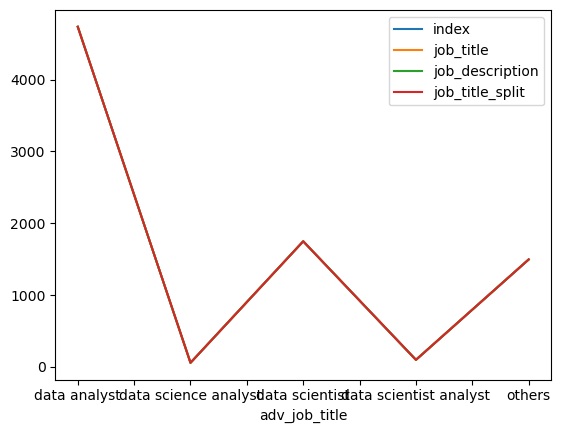

In [137]:
master_df.groupby(master_df['adv_job_title']).count().plot()